In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [3]:
data = pd.read_csv('../Data_Files/HangoverCure.dat', sep='\t')
data.head()

,drink,well,drunk
0,1,5,5
1,1,5,3
2,1,6,2
3,1,6,1
4,1,3,7


In [5]:
data.groupby('drink').describe()['well']

,count,mean,std,min,25%,50%,75%,max
drink,,,,,,,,
1,5.0,5.0,1.224745,3.0,5.0,5.0,6.0,6.0
2,5.0,5.8,1.483240,4.0,5.0,6.0,6.0,8.0
3,5.0,5.8,0.447214,5.0,6.0,6.0,6.0,6.0


In [6]:
data.groupby('drink').describe()['drunk']

,count,mean,std,min,25%,50%,75%,max
drink,,,,,,,,
1,5.0,3.6,2.408319,1.0,2.0,3.0,5.0,7.0
2,5.0,4.2,1.788854,2.0,3.0,4.0,6.0,6.0
3,5.0,2.4,0.547723,2.0,2.0,2.0,3.0,3.0


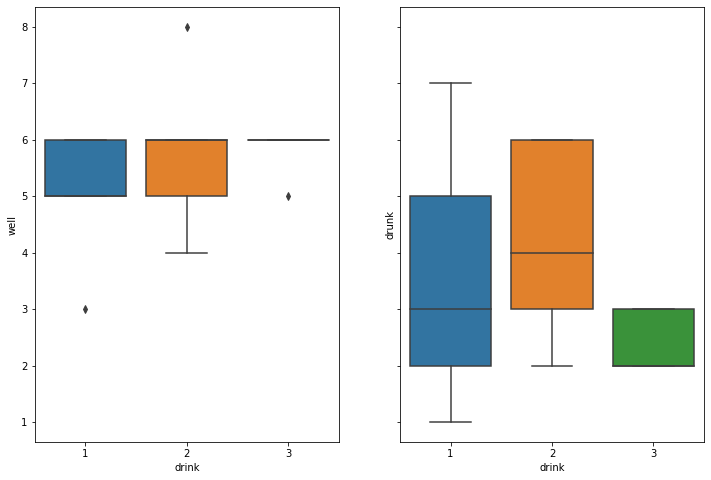

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,8))
_ = sns.boxplot(x='drink', y='well', data=data, ax=ax1)
_ = sns.boxplot(x='drink', y='drunk', data=data, ax=ax2)

In [8]:
data_1 = data[data['drink']==1]
data_2 = data[data['drink']==2]
data_3 = data[data['drink']==3]

In [9]:
st.levene(data_1['well'], data_2['well'], data_3['well'])

LeveneResult(statistic=1.3684210526315788, pvalue=0.2915149916191383)

In [10]:
m01 = smf.ols('drunk~C(drink)', data=data).fit()
anova_table = sm.stats.anova_lm(m01)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(drink),2.0,8.4,4.2,1.354839,0.29476
Residual,12.0,37.2,3.1,NaN,NaN


In [11]:
m02 = smf.ols('well~drunk+C(drink)', data=data).fit()
m02.summary()

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   well   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     11.07
Date:                Thu, 29 Oct 2020   Prob (F-statistic):            0.00119
Time:                        17:52:44   Log-Likelihood:                -12.108
No. Observations:                  15   AIC:                             32.22
Df Residuals:                      11   BIC:                             35.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.9742      0.469     14.869      0.000       5.942       8.007
C(drink)[T.2]     1.1290      0.405      2.785      0.018       0.237       2.021
C(drink)[T.3]     0.1419      0.420      0.338      0.741      -0.781       1.065
drunk            -0.5484      0.104     -5.281      0.000      -0.777      -0.320
==============================================================================
Omnibus:                        0.025   Durbin-Watson:                   2.323
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.245
Skew:                          -0.029   Prob(JB):                        0.885
Kurtosis:                       2.377   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
anova_table2 = sm.stats.anova_lm(m02, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(drink),3.464290,2.0,4.317700,0.041299
drunk,11.187097,1.0,27.885965,0.000260
Residual,4.412903,11.0,NaN,NaN


### y = 6.9742 + 1.129 t2 + 0.1419 t3 -0.5484 * data['drunk'].mean()

In [13]:
y_water = 6.9742 -0.5484*data['drunk'].mean()
y_water

5.10964

In [14]:
y_glu = 6.9742 -0.5484*data['drunk'].mean()+1.129*1
y_glu

6.23864

In [15]:
y_cola = 6.9742 -0.5484*data['drunk'].mean()+0.1419*1
y_cola

5.251539999999999

### calculating the effect size

In [16]:
eta_square_drink = 3.464/(3.464+4.413)
eta_square_drunk = 11.187/(11.187+4.413)

In [17]:
eta_square_drink

0.4397613304557572

In [18]:
eta_square_drunk

0.7171153846153846

### Planned Contrast

In [20]:
contrast1 = [1,2, 1]
contrast2 = [-1,0,1]
contrast = np.vstack((contrast1, contrast2))
contrast = contrast.T
contrast

array([[ 1, -1],
       [ 2,  0],
       [ 1,  1]])

In [21]:
planned_custom = smf.ols("well ~ drunk+C(drink, contrast)", data=data)
res_custom = planned_custom.fit()
print(res_custom.summary())

                            OLS Regression Results                            
Dep. Variable:                   well   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     11.07
Date:                Thu, 29 Oct 2020   Prob (F-statistic):            0.00119
Time:                        17:56:13   Log-Likelihood:                -12.108
No. Observations:                  15   AIC:                             32.22
Df Residuals:                      11   BIC:                             35.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/home/atrides/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
anova_table = sm.stats.anova_lm(res_custom)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(drink, contrast)",2.0,2.133333,1.066667,2.658869,0.114296
drunk,1.0,11.187097,11.187097,27.885965,0.000260
Residual,11.0,4.412903,0.401173,NaN,NaN


In [24]:
def r_contrast(t,df):
    return np.sqrt(t**2/(t**2+df))

In [25]:
df = 15-(2+1)-1
df

11

In [26]:
r_contrast(-2.870 ,11)

0.6543563979088152

In [27]:
r_contrast(0.338  ,11)

0.10138570765033218

In [28]:
r_contrast(-5.281  ,df)

0.846843185979461

#### # The covariate, drunkenness, was significantly related to the how ill the person felt the next day, F(1, 11) = 27.89, p < .001, η2 = .72. There was also a significant effect of the type of drink on how well the person felt after controlling for how drunk they were the night before, F(2, 11) = 4.32, p < .05, η2 = .44.


#### # Planned contrasts revealed that having Lucozade significantly improved how well you felt compared to having cola or water, t(11) = 2.87, p < .05, r = .65, but having cola was no better than having water, t(11) = 0.34, ns, r = .10. We can conclude that colaand water have the same effects on hangovers but that Lucozade seems significantly better at curing hangovers than cola.
